## import Deps

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2023-03-16 14:12:56.513612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 14:12:56.886628: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 14:12:56.886737: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-16 14:12:59.554874: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
img_array=cv2.imread('raw_data/Dataset/Closed/s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)

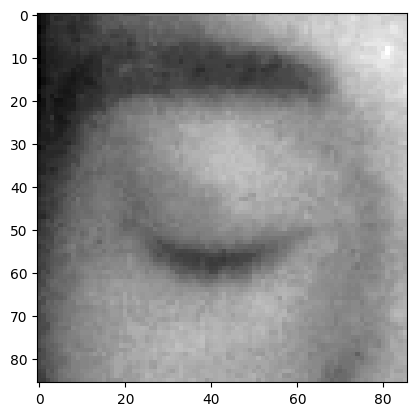

In [3]:
plt.imshow(img_array,cmap='gray')

In [4]:
img_array.shape

(86, 86)

In [2]:
data_dir='raw_data/Dataset/'
classes=['Open','Closed']
# iterate
for category in classes:
    path=os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        bgRGB=cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/Dataset/Open'

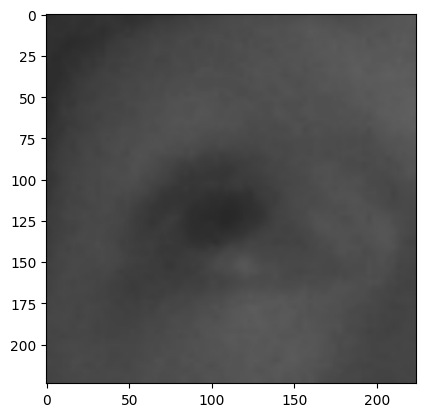

In [6]:
img_size=224
new_array=cv2.resize(bgRGB,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [7]:
new_array.shape

(224, 224, 3)

In [8]:
training_data=[]

def create_training_data():
    for category in classes:
        path=os.path.join(data_dir,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                bgRGB=cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
                new_array=cv2.resize(bgRGB,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_data()

In [10]:
len(training_data)

510

In [11]:
import random

random.shuffle(training_data) 

In [12]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(510, 224, 224, 3)

In [14]:
# Normalize
X=X/255.0

In [15]:
y=np.array(y)

# Save the Data

In [ ]:
# import pickle

# pickle_out=open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.closea

# pickle_out=open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()

In [ ]:
# pickle_in=open("X.pickle","wb")
# X=pickle.load(pickle_in)

# pickle_in=open("y.pickle",'wb')
# y=pickle.load(pickle_in)

## Deep learning model for training 

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model=tf.keras.applications.mobilenet.MobileNet()

2023-03-09 17:03:07.967733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rababeazil/.pyenv/versions/3.10.6/envs/drowsiness-detector/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-09 17:03:07.967791: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 17:03:07.967831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rababeazil-HP-EliteBook-840-G2): /proc/driver/nvidia/version does not exist
2023-03-09 17:03:07.968517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them i

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer Learning

In [20]:
base_input= model.layers[0].input
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [21]:
base_output=model.layers[-4].output
base_output

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'dropout')>

In [22]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer) #(1/0)
final_output=layers.Activation('sigmoid')(final_output) #binary classification

In [23]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## Binary classification (Open/Closed)

In [25]:
new_model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [26]:
new_model.fit(X,y,epochs=1,validation_split=0.1) #training

2023-03-09 17:08:29.972639: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 276369408 exceeds 10% of free system memory.


15/15 [==============================] - 197s 11s/step - loss: 0.1473 - accuracy: 0.9455 - val_loss: 10.2540 - val_accuracy: 0.4902


In [ ]:
# save the model
# new_model.save("model.h5")

In [ ]:
# new_model=tf.keras.models.load_model('model.h5')

## Check the network for predictions

In [27]:
img_array=cv2.imread('raw_data/Dataset/Closed/s0001_00036_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
bgRGB=cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
new_array=cv2.resize(bgRGB,(img_size,img_size))

In [28]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [29]:
X_input.shape

(1, 224, 224, 3)

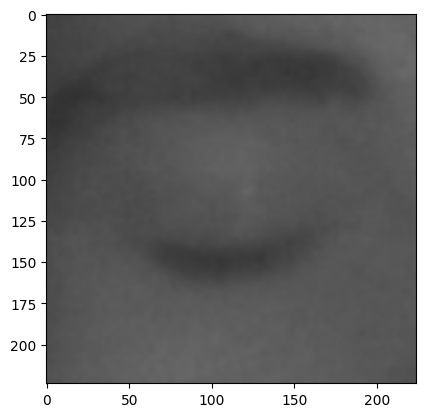

In [30]:
plt.imshow(new_array)

In [31]:
X_input=X_input/255.0

In [32]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 2s 2s/step


In [33]:
prediction

array([[1.]], dtype=float32)

## unknown image

In [53]:
img=cv2.imread('raw_data/Dataset/test_open.jpeg')

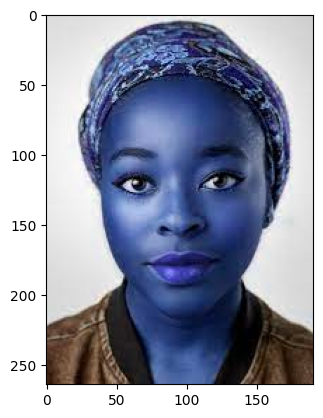

In [54]:
plt.imshow(img,cmap='gray')

In [55]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

In [56]:
eyeCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")

In [57]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [58]:
eyes=eyeCascade.detectMultiScale(gray,1.1,4)

In [59]:
for(X,y,w,h) in eyes:
    cv2.rectangle(img,(X,y),(X+w,y+h),(0,254,0),2)

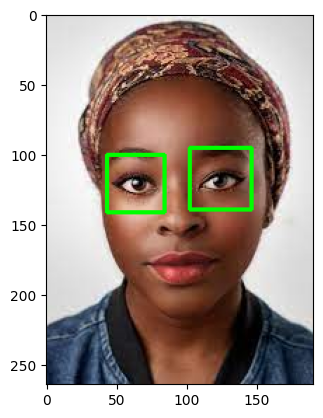

In [60]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Cropping the eye image

In [61]:
eyeCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes=eyeCascade.detectMultiScale(gray,1.1,4)
for X,y,w,h in eyes:
    roi_gray=gray[y:y+h,X:X+w]
    roi_color=img[y:y+h,X:X+w]
    eyess=eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print('Eyes are not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
    

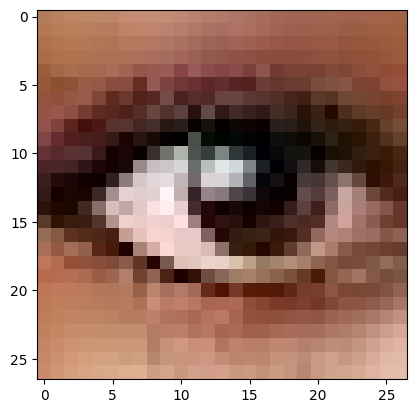

In [62]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [63]:
eyes_roi.shape

(27, 27, 3)

In [67]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [68]:
final_image.shape

(1, 224, 224, 3)

In [69]:
new_model.predict(final_image)

1/1 [==============================] - 0s 111ms/step


array([[1.]], dtype=float32)

## Real-time video demo

In [ ]:
import cv2 ### pip install opencv-python ## pip install opencv-contrib-python fulLpackage #from deepface import DeepFace ## pip install deepface

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2. VideoCapture (1)

# Check if the webcam is opened correctly
if not cap.isOpened() :
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError ("Cannot open webcam")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty ())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame [y:y+h, x: x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims (final_image,axis =0) ## need fourth dimension
    final_image= final_image/255.0
    Predictions = new_model.predict(final_image)
    if (np.round(Predictions)>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    # Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (X, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame, status,(50, 50), font, 3,(0, 0, 255),2, cv2.LINE_4)
    
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()